# Justyna Muzyka, Rafał Maziejuk
## WCY19IJ2S1
## Laboratorium 1

In [53]:
import nltk
import requests
import string
import pandas as pd

nltk.download('punkt')
requests.encoding = 'utf-8'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Punkt 1

In [54]:
books = {
    'Pamietnik Justyny': 'https://wolnelektury.pl/media/book/txt/pamietnik-justyny.txt',
    'Czaty': 'https://wolnelektury.pl/media/book/txt/czaty.txt',
    'Krol i Bondarywna': 'https://wolnelektury.pl/media/book/txt/krol-i-bondarywna.txt',
    'Mazepa': 'https://wolnelektury.pl/media/book/txt/slowacki-mazepa.txt',
    'Studium w szkarlacie': 'https://wolnelektury.pl/media/book/txt/doyle-studium-w-szkarlacie.txt'
}

toBeReplaced = [
    string.punctuation,
    string.digits,
    '…-–—”„'
]

downloadedBooks = {}
for bookName, url in books.items():
    request = requests.get(url)
    request.encoding = request.apparent_encoding
    
    parsedText = request.text
    for replacement in toBeReplaced:
        translation = str.maketrans({ord(character): ' ' for character in replacement})
        parsedText = parsedText.translate(translation)
        
    downloadedBooks[bookName] = parsedText

In [55]:
polishStopWords = requests.get('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').text.split('\n')

tokenizedBooks = {}
for bookName, text in downloadedBooks.items():
    tokenizedText = nltk.word_tokenize(text)
    tokenizedText = [word.lower() for word in tokenizedText if word.lower() not in polishStopWords]
    tokenizedBooks[bookName] = tokenizedText   
    print("Ilosc tokenow w \"" + bookName + "\" - " + str(len(tokenizedBooks[bookName])))

Ilosc tokenow w "Pamietnik Justyny" - 15198
Ilosc tokenow w "Czaty" - 411
Ilosc tokenow w "Krol i Bondarywna" - 28381
Ilosc tokenow w "Mazepa" - 7951
Ilosc tokenow w "Studium w szkarlacie" - 20686


## Punkt 2

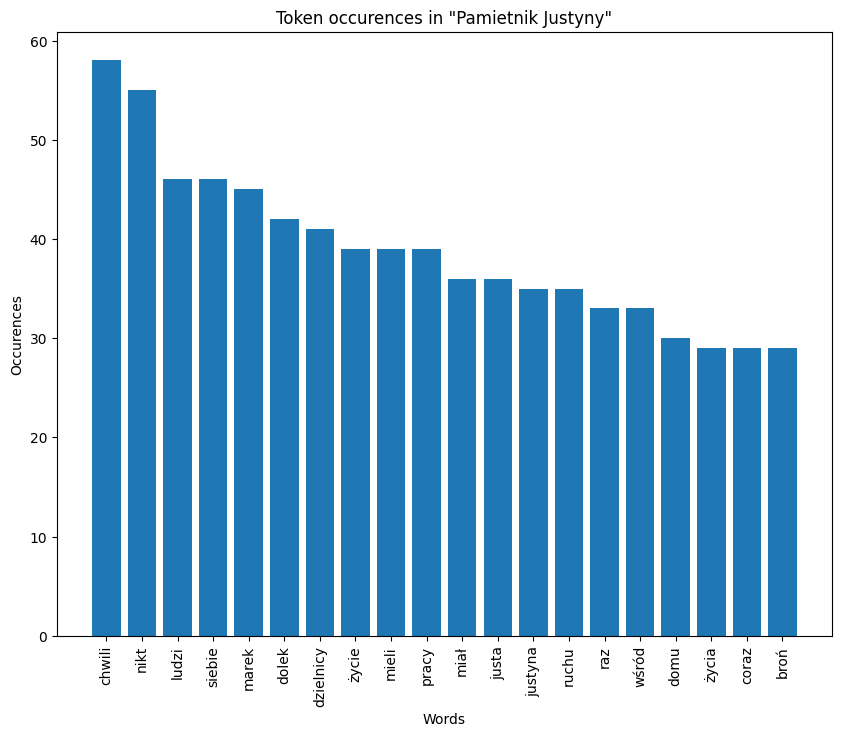

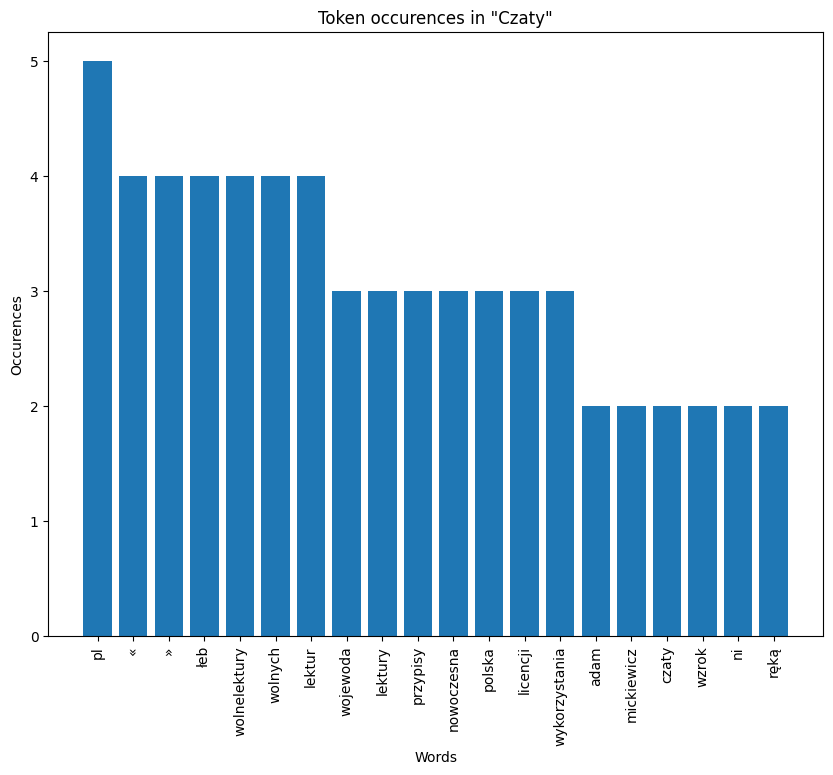

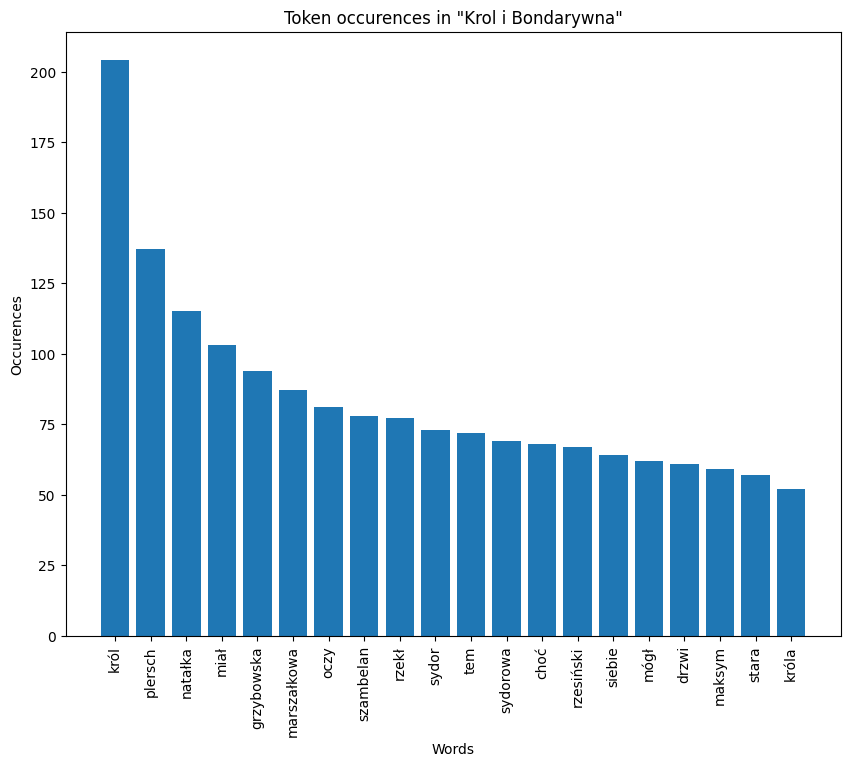

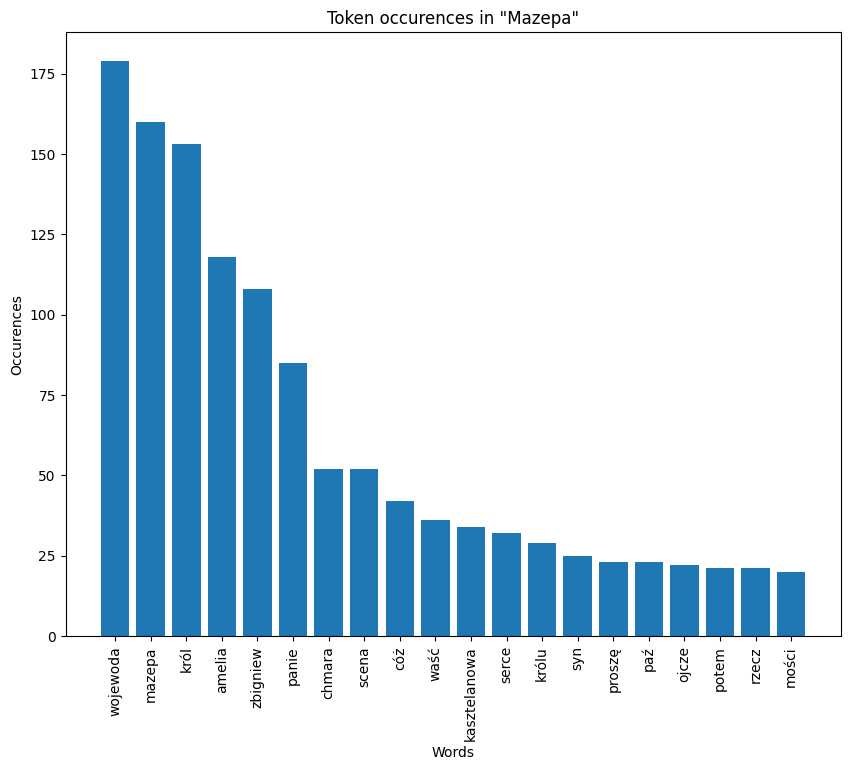

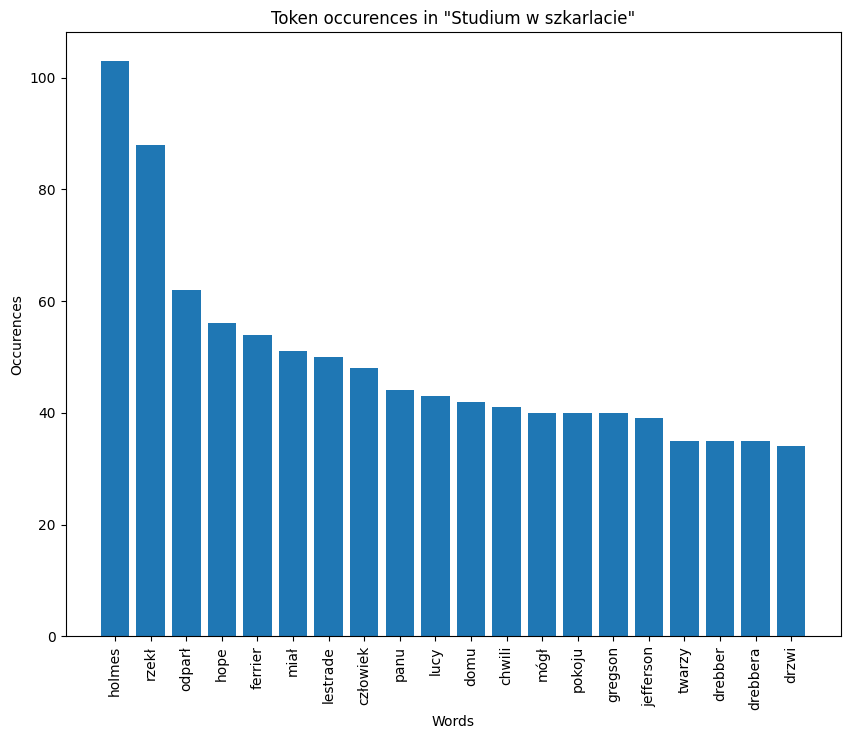

In [56]:
import matplotlib.pyplot as plt

wordsOccurencesPerBook = {}
for bookName, tokenizedText in tokenizedBooks.items():
    wordsOccurences = {}
    for word in tokenizedText:
        wordsOccurences[word] = tokenizedText.count(word)
        
    wordsOccurences = {key: value for key, value in sorted(wordsOccurences.items(), key=lambda item: item[1], reverse=True)}
    wordsOccurencesPerBook[bookName] = wordsOccurences

for bookName, wordsOccurences in wordsOccurencesPerBook.items():
    limitedKeys = list(wordsOccurences.keys())[:20]
    limitedValues = list(wordsOccurences.values())[:20]
    
    plt.figure(figsize=(10, 8), dpi=100)
    plt.title(f"Token occurences in \"{bookName}\"")
    plt.bar(range(len(limitedKeys)), limitedValues)
    plt.xticks(range(len(limitedKeys)), limitedKeys, rotation=90)
    plt.xlabel("Words")
    plt.ylabel("Occurences")
    plt.show()

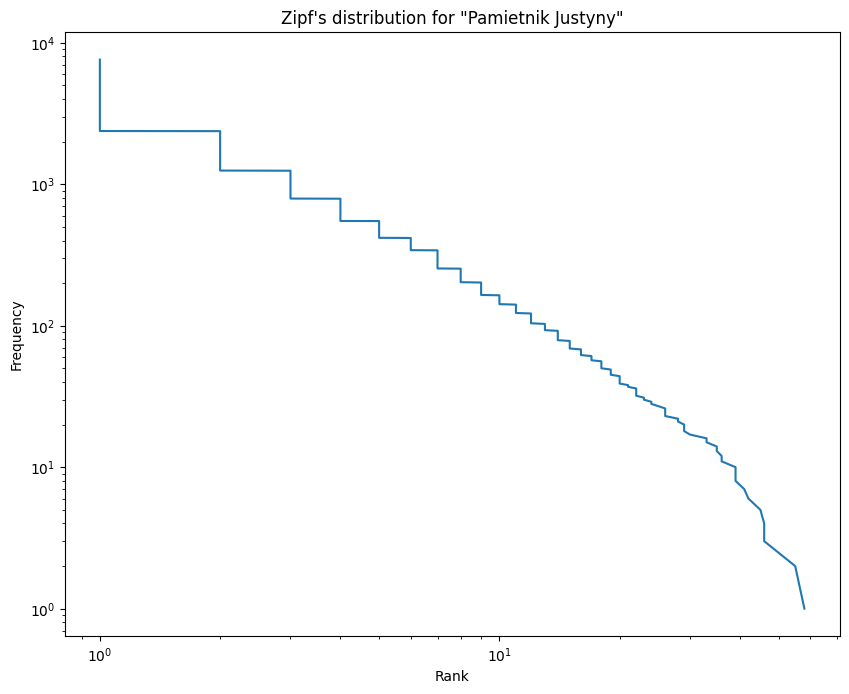

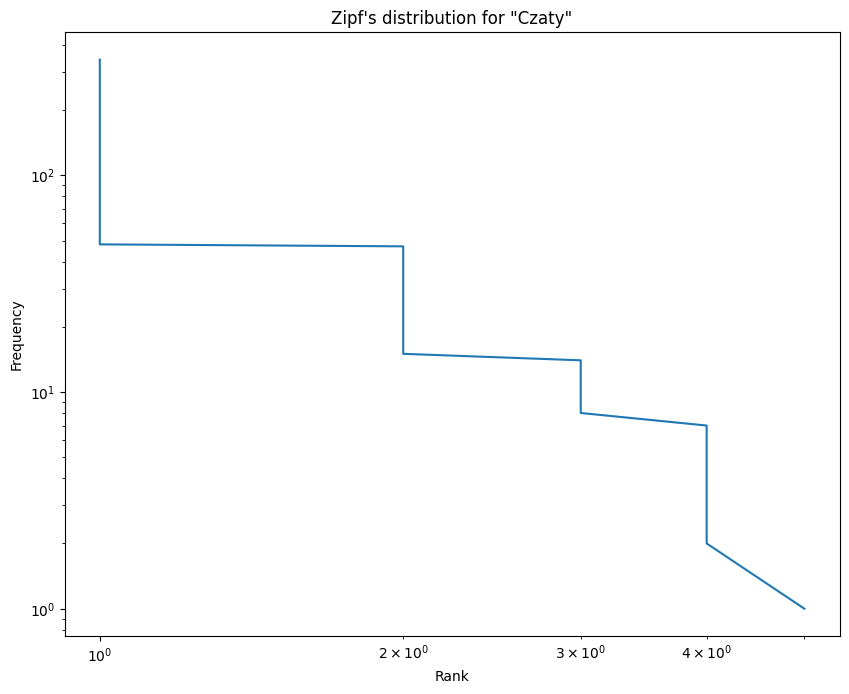

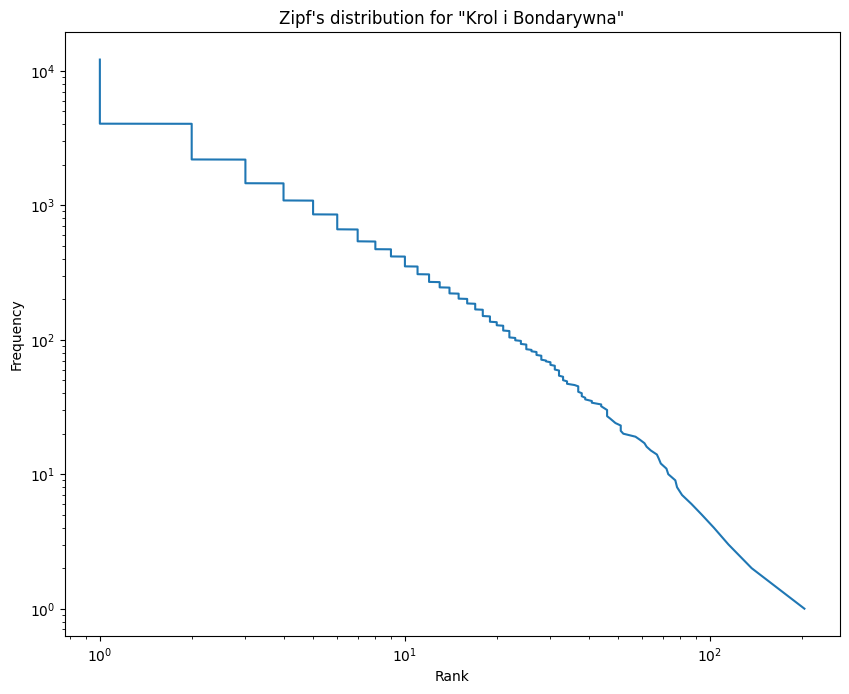

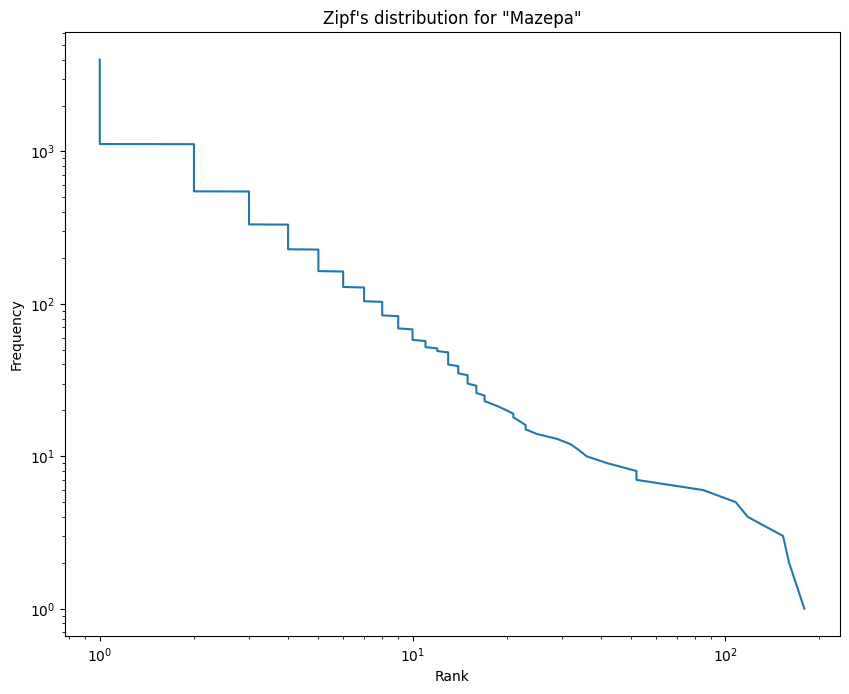

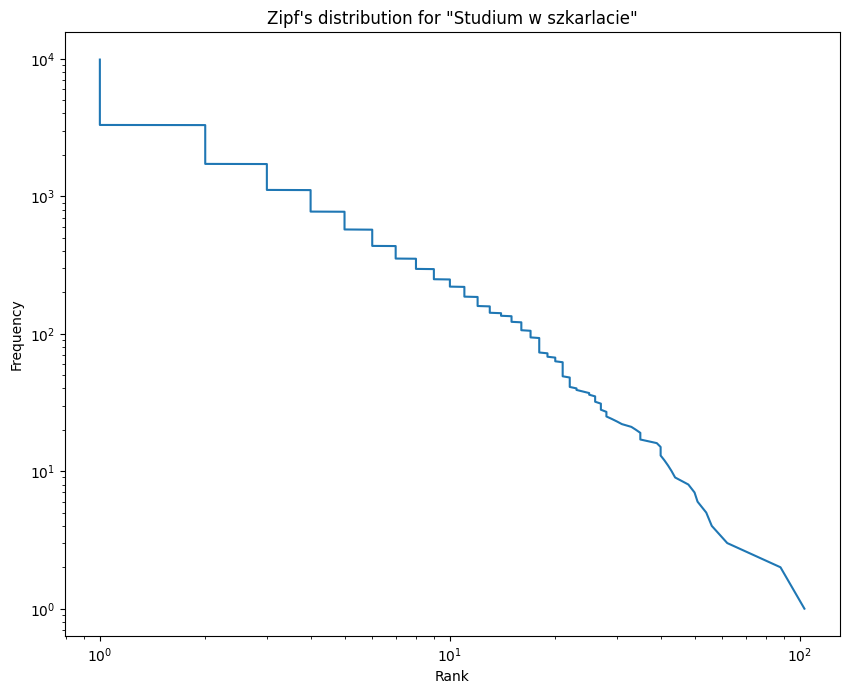

In [57]:
wordsFrequenciesPerBook = {}
for bookName, tokenizedText in tokenizedBooks.items():
    wordsFrequencies = nltk.FreqDist()
    for word in tokenizedText:
        wordsFrequencies[word] += 1
    
    wordsFrequenciesPerBook[bookName] = wordsFrequencies
    
for bookName, wordsFrequencies in wordsFrequenciesPerBook.items(): 
    ranks = []
    frequencies = []
    for rank, word in enumerate(wordsFrequencies):
        ranks.append(rank + 1)
        frequencies.append(wordsFrequencies[word])
    
    plt.figure(figsize=(10, 8), dpi=100)
    plt.title(f"Zipf's distribution for \"{bookName}\"")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.loglog(frequencies, ranks)
    plt.show()

## Wnioski punkt 2

Na samym początku warto zwrócić uwagę na rozmiary zbiorów danych. Wybrane przez nas ksiązki miały między 411 (Czaty) a 28381 (Krol i Bondarywna) tokenów. Możemy zaobserwować, że przy większej ilości tokenów pod koniec linia wykresu staje się bardziej monotonna. Jednak im bliżej początku osi x każdy z wykresów zaczyna przypominać kształt schodów. Pod koniec linia dla większości wykresów gwałtownie ucieka w stronę osi X. Może to świadczyć o tym, że prawo Zipfa nie zostało całkowicie spełnione, zachodzi ono tylko dla określonych słów (zazwyczaj ze środkowego przedziału). Ze względu na małą liczbę tokenów w poszczególnych książkach wnioski nie są dokładne. Aby uzyskać dokładniejsze wyniki należałoby zebrać większą ilość danych.

## Punkt 3

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame

corpus = [text for text in downloadedBooks.values()]
vectorizer = TfidfVectorizer()

tfidfMatrix = vectorizer.fit_transform(corpus)
tfidfTokens = vectorizer.get_feature_names_out()
result = DataFrame(
    data=tfidfMatrix.toarray(),
    index=downloadedBooks.keys(),
    columns=tfidfTokens
)

result

,abdykujmy,abeillarda,aby,abym,abyś,abyśmy,acan,acana,acani,acanką,...,żądaniu,żądasz,żądać,żądni,żądnym,żądza,żądzach,żądzy,żłobie,żłobu
Pamietnik Justyny,0.000000,0.000000,0.005906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00131,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Czaty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Krol i Bondarywna,0.000709,0.000709,0.033139,0.002373,0.000475,0.000572,0.000572,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.001417,0.00000,0.000709,0.000572,0.000000,0.00000,0.000709,0.000709
Mazepa,0.000000,0.000000,0.010160,0.001510,0.001510,0.000000,0.005456,0.002254,0.002254,0.002254,...,0.00000,0.002254,0.000000,0.00000,0.000000,0.000000,0.002254,0.00000,0.000000,0.000000
Studium w szkarlacie,0.000000,0.000000,0.025050,0.001527,0.002291,0.000920,0.000000,0.000000,0.000000,0.000000,...,0.00114,0.000000,0.000000,0.00000,0.000000,0.001840,0.000000,0.00114,0.000000,0.000000


## Punkt 4

<AxesSubplot: >

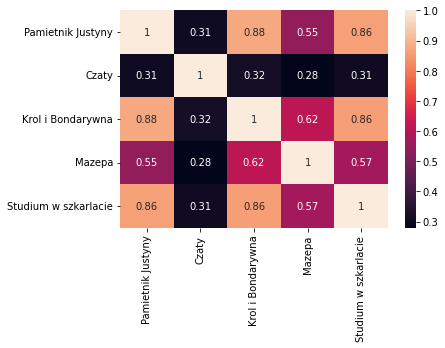

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
from seaborn import heatmap

documentDistanceMatrix = cosine_similarity(tfidfMatrix)
result = DataFrame(
    data=documentDistanceMatrix,
    index=downloadedBooks.keys(),
    columns=downloadedBooks.keys()
)
result

heatmap(documentDistanceMatrix, annot=True, xticklabels=downloadedBooks.keys(), yticklabels=downloadedBooks.keys())

**Stworzenie macierzy odległości dokumentów**


Zauważyć można, że książki "Pamietnik Justyny", "Studium w Szklarcie" oraz "Krol i Bondarywna" są do siebie bardzo podobne.
Między sobą inne książki również wykazują podobieństwo, ale nie jest ono tak duże jak między tymi trzema. 
Wynikać może to z tego, że zostały napisane w podobnym okresie czasu.

## Punkt 5

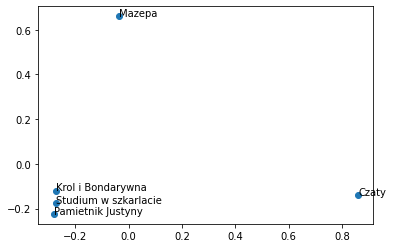

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reducedTfidfMatrix = pca.fit_transform(tfidfMatrix.toarray())
x = reducedTfidfMatrix[:, 0]
y = reducedTfidfMatrix[:, 1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, bookName in enumerate(downloadedBooks.keys()):
    ax.annotate(bookName, (x[i], y[i]))
    
plt.show()

# Wnioski punkt 6

**W obu przypadkach jednoznacznie widać że podobieństwo między sobą wykzują 3 książki:"Pamietnik Justyny", "Studium w Szklarcie" oraz "Krol i Bondarywna". Na macierzy heat map wyróżnia się dużo jasnych kolorów w szczególności w przypadku książek wymienionych powyżej. Tak samo na wykresie widoczne jest bliskie skorelowanie współżędnych dla punktów reprezentujących wyżej wymienione pozycje. Wyniki z obu podpunktów wydają się spójne ponieważ wskazóją na ten sam wniosek, jednakże z punktu 4 (heatmap) dowiedzieliśmy się również że nieco podobna do pozycji wymmienionych wcześniej jest również "Mazepa".**